# Agrupamiento conocido: Jerárquico Aglomerativo

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree, dendrogram
from sklearn.metrics import silhouette_score,calinski_harabaz_score


### Carga de datos


In [2]:
#Carga de datos
np.random.seed(31) # Fijamos una semilla para asegurar la reproducibilidad de la práctica
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]
# Valores de la clase
Dy = D[:,2]

### Descripción de los datos cargados

El dataset cargado tiene 1999 instancias.
 
Matriz original D:  [[ 51.72   5.     2.  ]
 [ 47.93   5.     2.  ]
 [220.39   7.     3.  ]
 ...
 [ 30.15   6.     2.  ]
 [ 49.9    6.     2.  ]
 [ 40.66   7.     2.  ]]
 
Matriz sin los valores de la clase:  [[ 51.72   5.  ]
 [ 47.93   5.  ]
 [220.39   7.  ]
 ...
 [ 30.15   6.  ]
 [ 49.9    6.  ]
 [ 40.66   7.  ]]
 
Matriz de los valores de la clase:  [2. 2. 3. ... 2. 2. 2.]


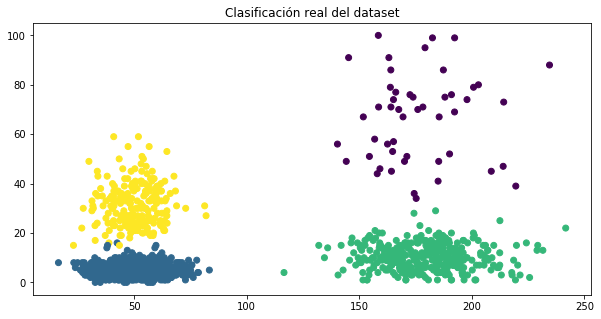

In [3]:
print('El dataset cargado tiene',Dy.size,'instancias.')
print(' ')
print ('Matriz original D: ', D)
print(' ')
print ('Matriz sin los valores de la clase: ', Dx)
print(' ')
print ('Matriz de los valores de la clase: ',  Dy)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)
ax.set_title('Clasificación real del dataset')
fig.text=''


### Funciones

In [1]:
# Métricas
def medida_R_cuadrado(X, Xyp, cXs):
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
   
    return interior/sumTotal

def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j])) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)

def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    return np.sum([totales[k] * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign


In [4]:
def plot_varios(Dx,Dy,K, modeloDisimilitudMinima,modeloDisimilitudMedia,modeloDisimilitudMaxima):
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=Dy)
    ax[0].set_title('Datos clasificación real')

    #modelo = linkage(Dx, 'single')
    ax[1].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modeloDisimilitudMinima, n_clusters = K).flatten())
    ax[1].set_title('Disimilitud mínima')
    
    #modelo = linkage(Dx, 'average')
    ax[2].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modeloDisimilitudMedia, n_clusters = K).flatten())
    ax[2].set_title('Disimilitud media')
    
    #modelo = linkage(Dx, 'complete')
    ax[3].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modeloDisimilitudMaxima, n_clusters = K).flatten())
    ax[3].set_title('Disimilitud máxima')
    

def dibujar_dendograma(modelo,titulo):
    plt.figure(figsize=(25, 45))
    plt.title('Dendrograma de Clustering Jerárquico - ' + titulo)
    plt.xlabel('Índice del caso')
    plt.ylabel('Distancia')
    dendrogram(modelo)
    plt.show()

### Ejecución del algoritmo y resultados

In [5]:
modeloDisimilitudMinima = linkage(Dx, 'single')   # disimilitud mínima
modeloDisimilitudMaxima = linkage(Dx, 'complete') # disimilitud máxima
modeloDisimilitudMedia = linkage(Dx, 'average')  # disimilitud media

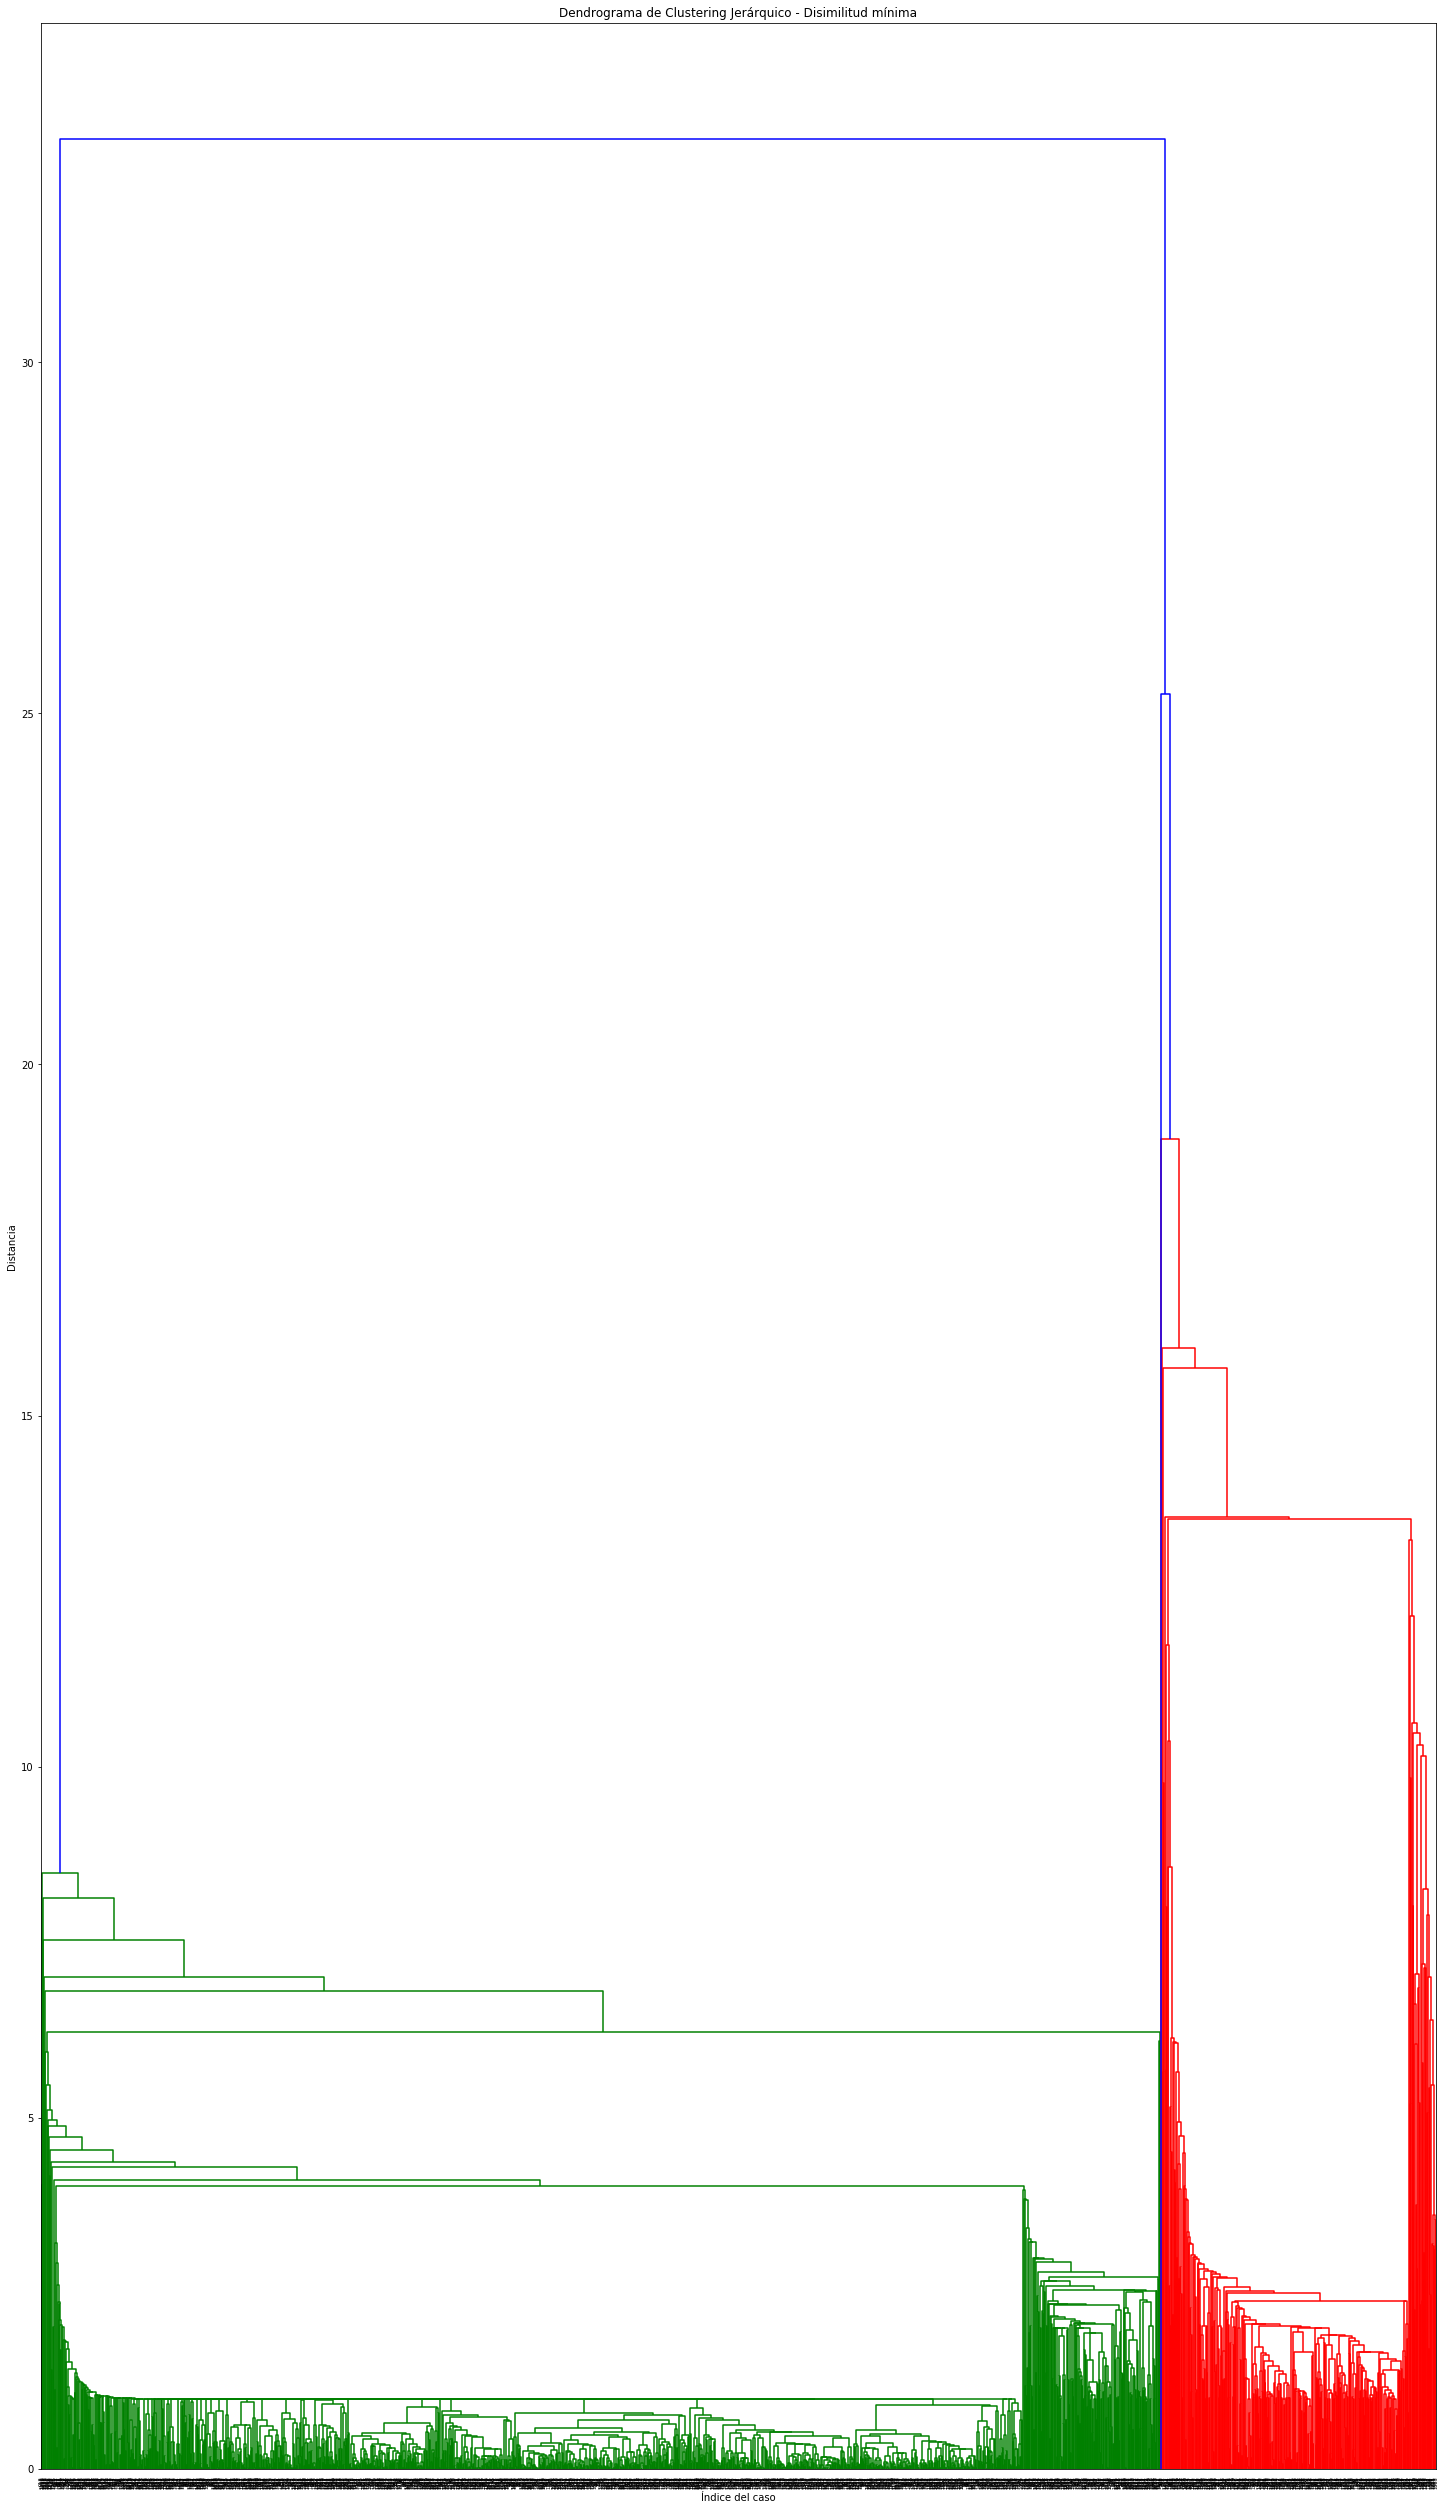

In [6]:
dibujar_dendograma(modeloDisimilitudMinima, "Disimilitud mínima")

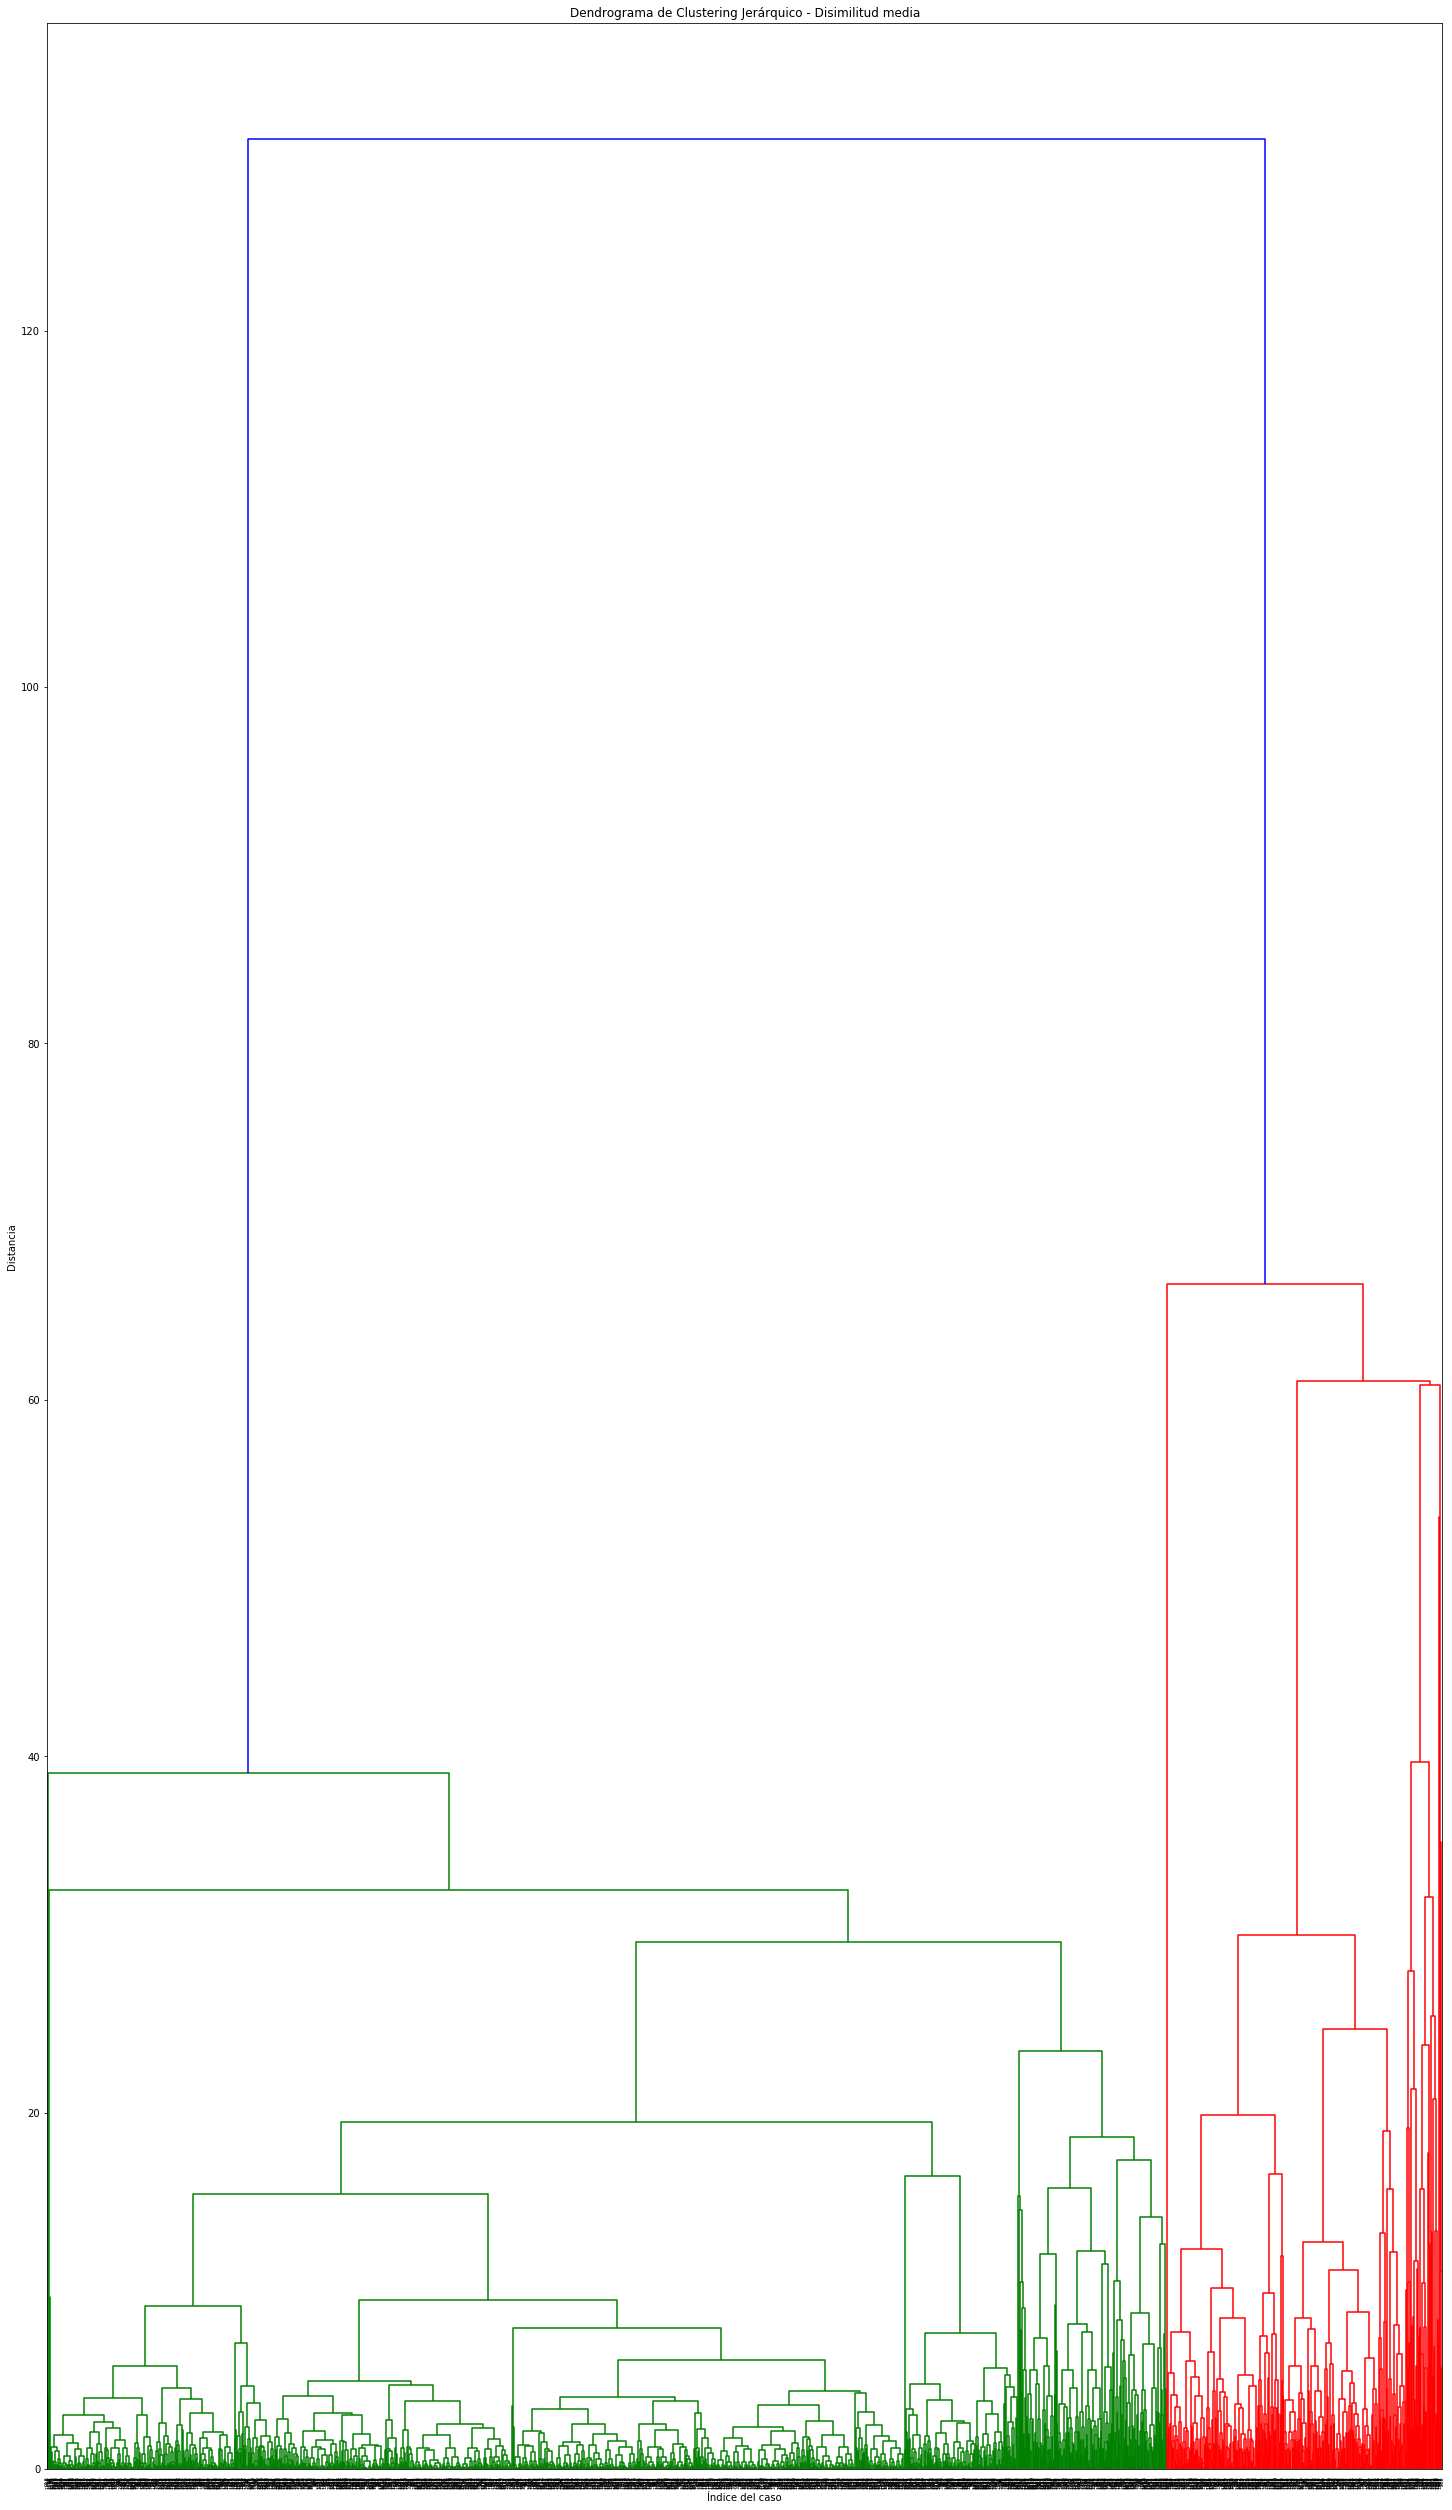

In [7]:
dibujar_dendograma(modeloDisimilitudMedia, "Disimilitud media")

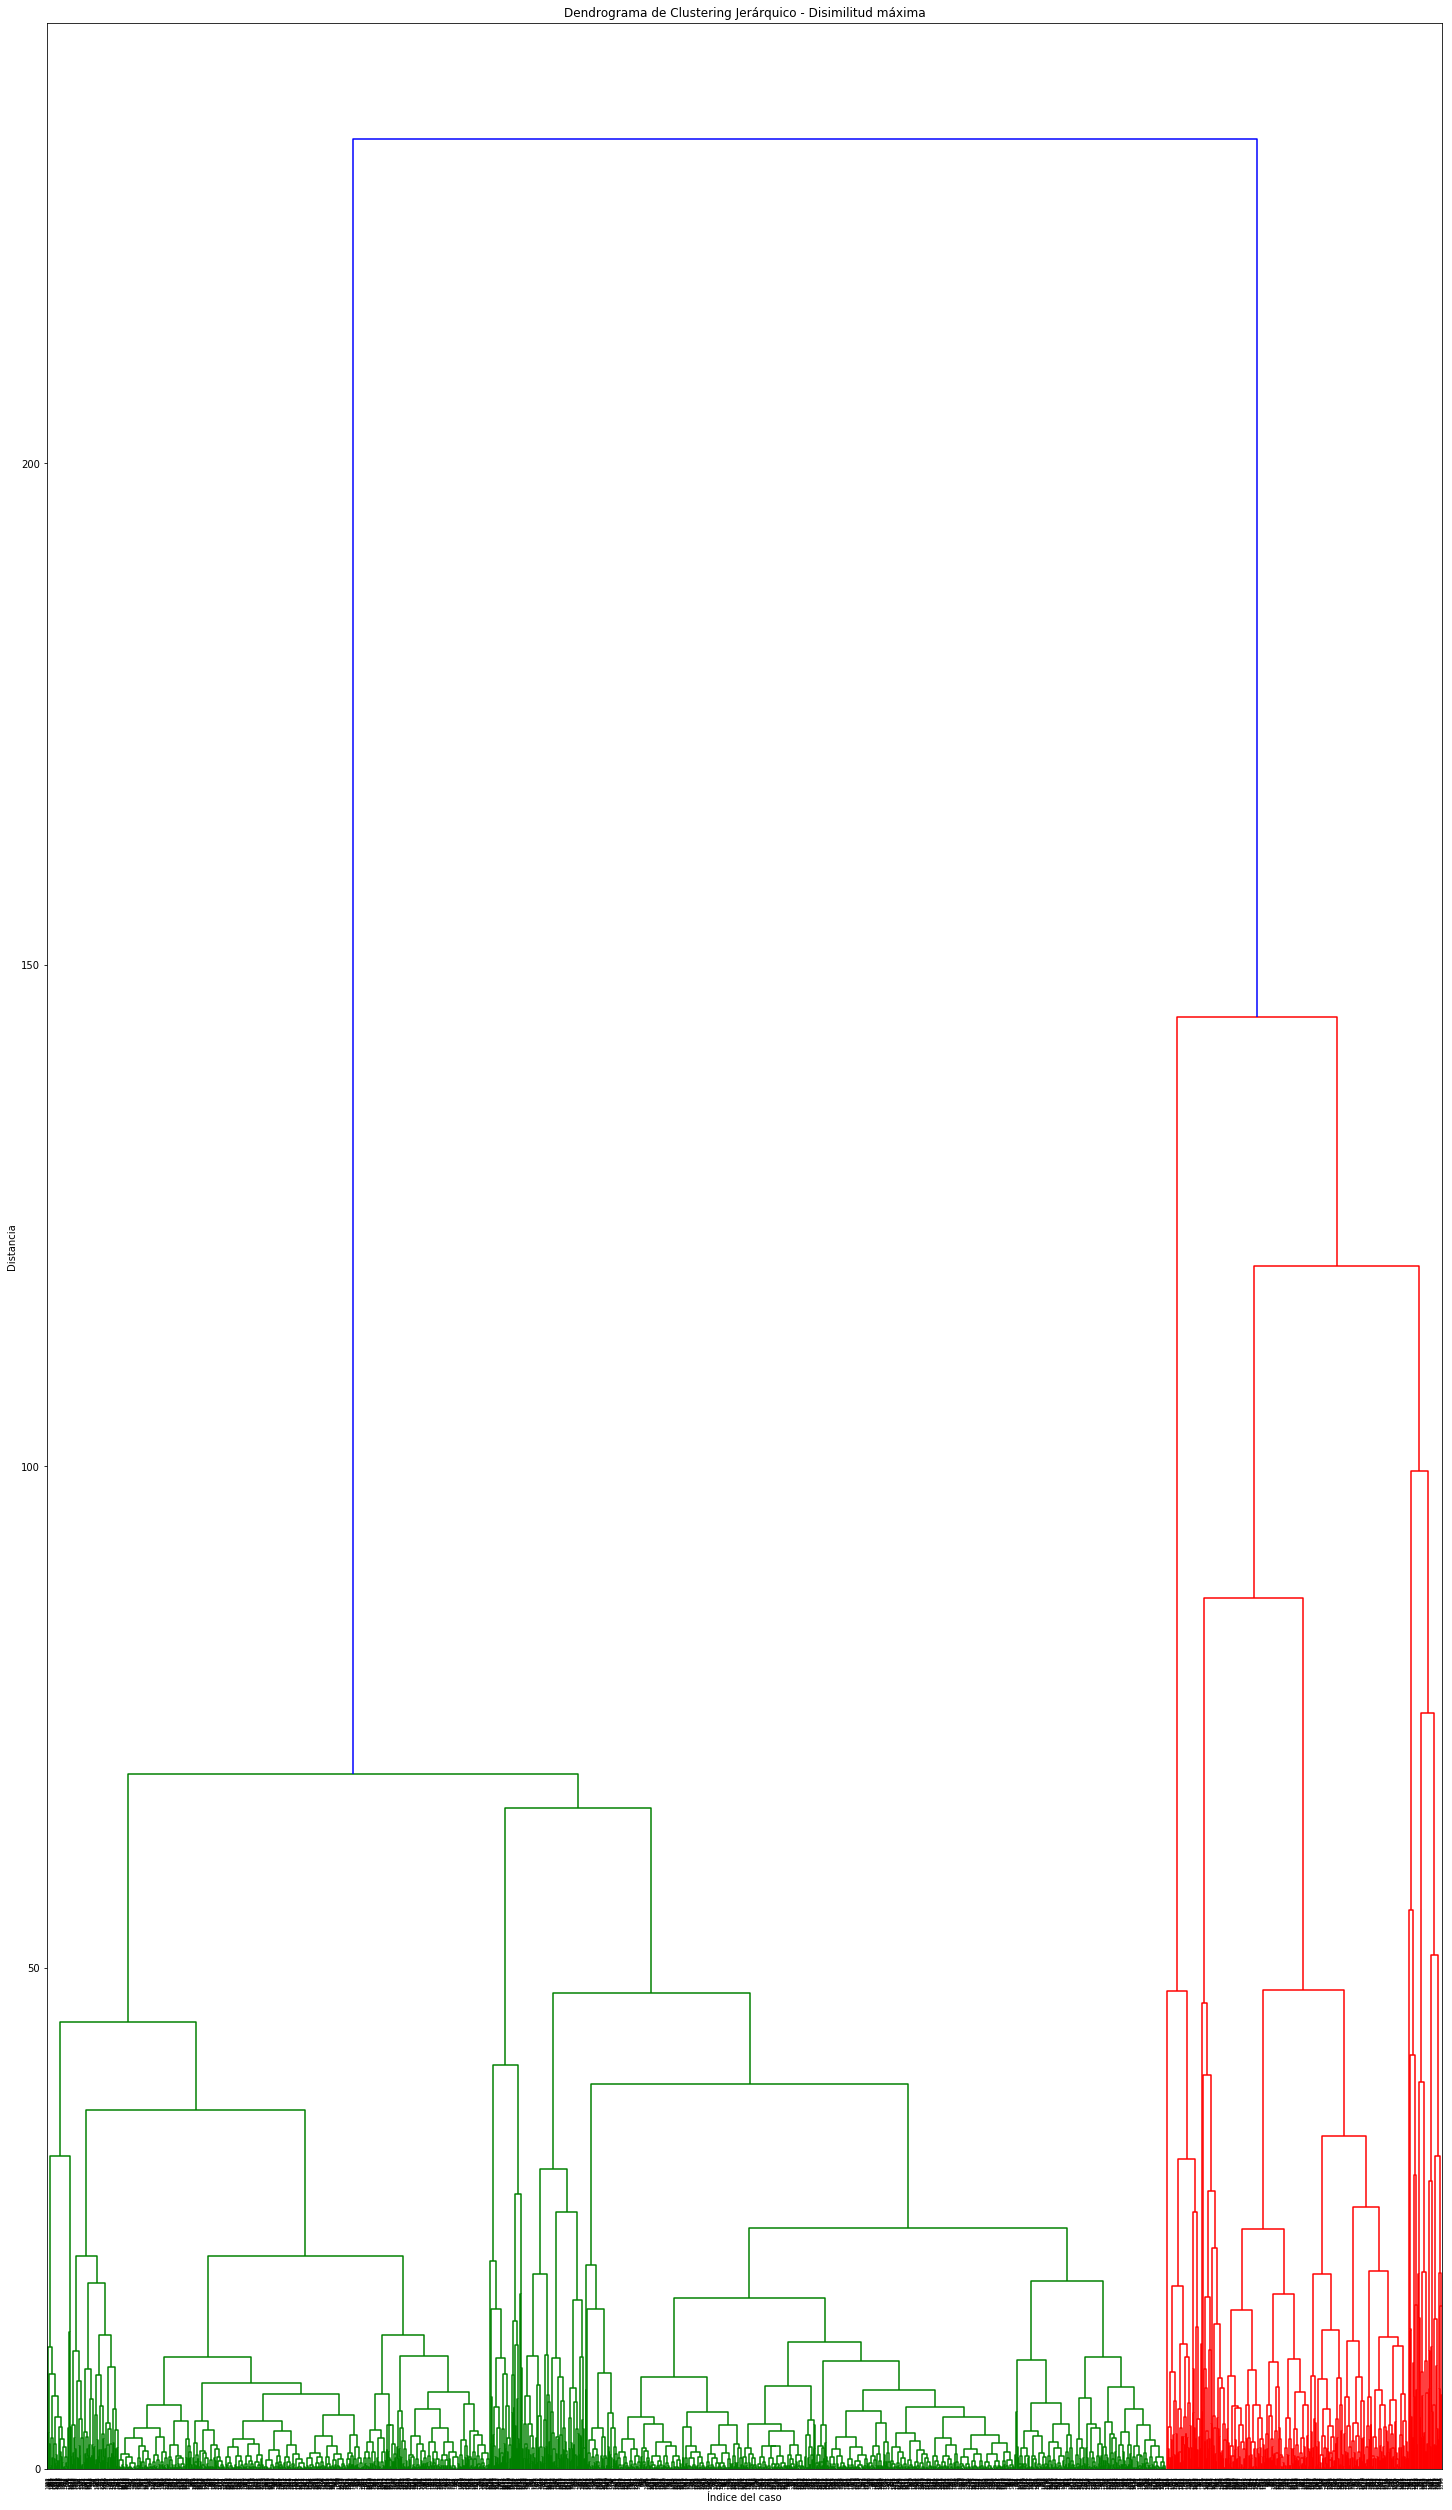

In [8]:
dibujar_dendograma(modeloDisimilitudMaxima, "Disimilitud máxima")

### Comparación de resultados estimados con valores reales

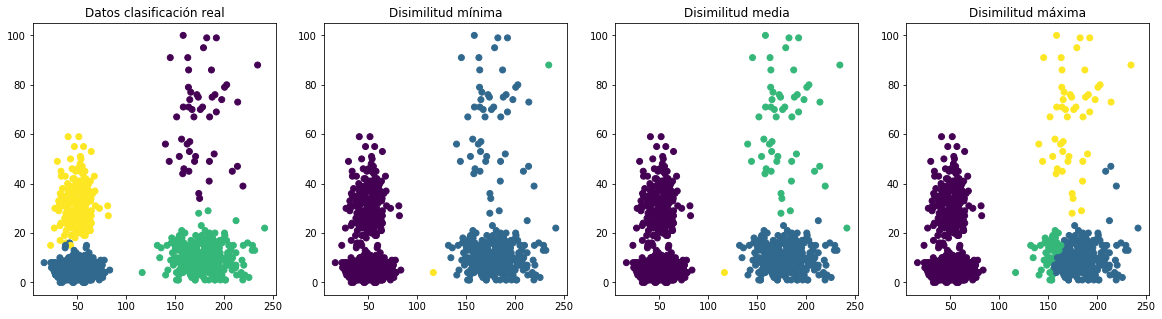

In [9]:
plot_varios(Dx,Dy,4,modeloDisimilitudMinima,modeloDisimilitudMedia,modeloDisimilitudMaxima)

### Métricas - ME QUEDO AQUIIIIII

In [2]:
matrizConfusion = matriz_confusion(Dy,Dyp)
print (' ')
print('Matriz de confusión:')
print(matrizConfusion)
print('El valor del error cometido es = ', medida_error(mC))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC))
print('El valor F1 es = ', medida_f1(mC))

NameError: name 'Dy' is not defined

In [10]:

Dx_K=Dx
print(Dx_K.shape)
#Dx_K[:,2]=cut_tree(modeloDisimilitudMinima, n_clusters = 4).flatten()
#Dx_K
np.append(Dx_K,cut_tree(modeloDisimilitudMinima, n_clusters = 4),1)
print(Dx_K.shape)
print(Dx_K[:,2])

from sklearn.metrics import silhouette_score,calinski_harabaz_score
partToEval = cut_tree(modeloDisimilitudMinima, n_clusters = 4).flatten()


(1999, 2)
(1999, 2)


IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:


K = 4
partToEval = cut_tree(modeloDisimilitudMinima, n_clusters = 4).flatten()

print (Dx)
print (partToEval)
print('La medida de Silueta con K =',K,'es',silhouette_score(Dx,partToEval))
print('La medida de Calinski Harabaz con K =',K,'es',calinski_harabaz_score(Dx, partToEval))      

rsilueta = np.zeros(mParticiones.shape[1])
rch = np.zeros(mParticiones.shape[1])
for K in np.arange(1,mParticiones.shape[1]-1):
    rsilueta[K] = silhouette_score(Dx, mParticiones[:,K])
    rch[K] = calinski_harabaz_score(Dx, mParticiones[:,K])

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(np.arange(1,mParticiones.shape[1]-1), rsilueta[np.arange(1,mParticiones.shape[1]-1)],
           linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot(np.arange(1,mParticiones.shape[1]-1), rch[np.arange(1,mParticiones.shape[1]-1)],
           linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de Calinski Harabaz")